## **3. Data Processing**

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/My Drive/ML")

Mounted at /content/gdrive


### (1) Load Data

In [ ]:
raw = pd.read_csv('FinancialNewsHeadline.csv', encoding='latin-1', names=['label', 'News_Headline'])
raw['label'].replace({'neutral':'Neutral', 'positive':'Positive', 'negative': 'Negative'}, inplace=True)
raw

,label,News_Headline
0,Neutral,"According to Gran , the company has no plans t..."
1,Neutral,Technopolis plans to develop in stages an area...
2,Negative,The international electronic industry company ...
3,Positive,With the new production plant the company woul...
4,Positive,According to the company 's updated strategy f...
...,...,...
4841,Negative,LONDON MarketWatch -- Share prices ended lower...
4842,Neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,Negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,Negative,Net sales of the Paper segment decreased to EU...


### (2) Prepare Dataset for Fine-tuning

##### For Models Other Than PorousAI FinBERT

In [ ]:
raw2 = raw.copy()
raw2['label'].replace({'Neutral':0, 'Positive':1, 'Negative':2}, inplace=True)
raw2 = raw2[['News_Headline', 'label']]
raw2

,News_Headline,label
0,"According to Gran , the company has no plans t...",0
1,Technopolis plans to develop in stages an area...,0
2,The international electronic industry company ...,2
3,With the new production plant the company woul...,1
4,According to the company 's updated strategy f...,1
...,...,...
4841,LONDON MarketWatch -- Share prices ended lower...,2
4842,Rinkuskiai 's beer sales fell by 6.5 per cent ...,0
4843,Operating profit fell to EUR 35.4 mn from EUR ...,2
4844,Net sales of the Paper segment decreased to EU...,2


In [ ]:
df_train, df_test, = train_test_split(raw2, stratify=raw2['label'], test_size=0.1, random_state=seed)
df_train, df_val = train_test_split(df_train, stratify=df_train['label'], test_size=0.1, random_state=seed)
print(df_train.shape, df_test.shape, df_val.shape)

(3924, 2) (485, 2) (437, 2)


##### For PorousAI FinBERT

In [ ]:
raw3 = raw.copy()
raw3['label'].replace({'Neutral':2, 'Positive':0, 'Negative':1}, inplace=True)
raw3 = raw3[['News_Headline', 'label']]
raw3

,News_Headline,label
0,"According to Gran , the company has no plans t...",2
1,Technopolis plans to develop in stages an area...,2
2,The international electronic industry company ...,1
3,With the new production plant the company woul...,0
4,According to the company 's updated strategy f...,0
...,...,...
4841,LONDON MarketWatch -- Share prices ended lower...,1
4842,Rinkuskiai 's beer sales fell by 6.5 per cent ...,2
4843,Operating profit fell to EUR 35.4 mn from EUR ...,1
4844,Net sales of the Paper segment decreased to EU...,1


In [ ]:
df_train1, df_test1, = train_test_split(raw3, stratify=raw3['label'], test_size=0.1, random_state=seed)
df_train1, df_val1 = train_test_split(df_train1, stratify=df_train1['label'], test_size=0.1, random_state=seed)
print(df_train1.shape, df_test1.shape, df_val1.shape)

(3924, 2) (485, 2) (437, 2)


### (3) Prepare the Final Test Dataset

In [ ]:
val_set = df_val.copy()
test_set = df_test.copy()
test_set = pd.concat([test_set, val_set], axis=0)
test_set.reset_index(inplace=True, drop = True)
test_set['label'].replace({0:'Neutral', 1:'Positive', 2:'Negative'}, inplace=True)
test_set

,News_Headline,label
0,"Of this , EUR 38.8 mn was net interest income .",Neutral
1,The government has instead proposed an exchang...,Neutral
2,"Nordea Pankki Suomi Oyj , according to previou...",Neutral
3,Under the agreement GeoSentric will provide Gy...,Positive
4,Both operating profit and turnover for the six...,Positive
...,...,...
917,"Finnish Suominen Flexible Packaging Ltd , owne...",Negative
918,"Alma Media holds 70 % of this company , the re...",Neutral
919,Less than ten people will face pension agreeme...,Neutral
920,"Purchase it for the 12MP snapper , if nothing ...",Neutral


In [ ]:
print(test_set.shape)

(922, 2)


## **4. Exploratory Data Analytics**

### (1) Frequency & Length

Facts:
1. Number of Sequences With Greater Than 512 Tokens: 0
2. Maximum Sequence Length: 150 Tokens
3. Average Sequence Length: 30.6 Tokens


<Figure size 1000x600 with 0 Axes>

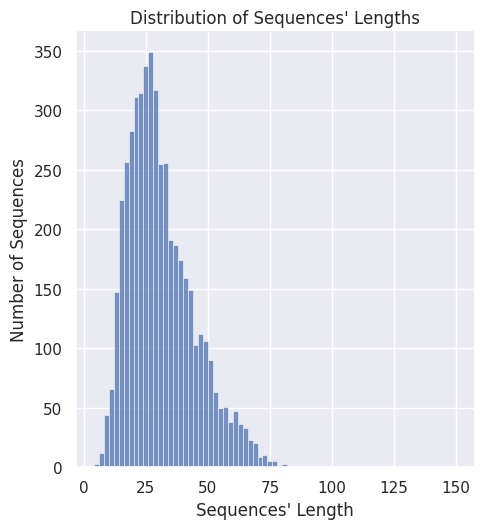

In [ ]:
frequency_length(raw, 'News_Headline')

### (2) Percentage & Distribution

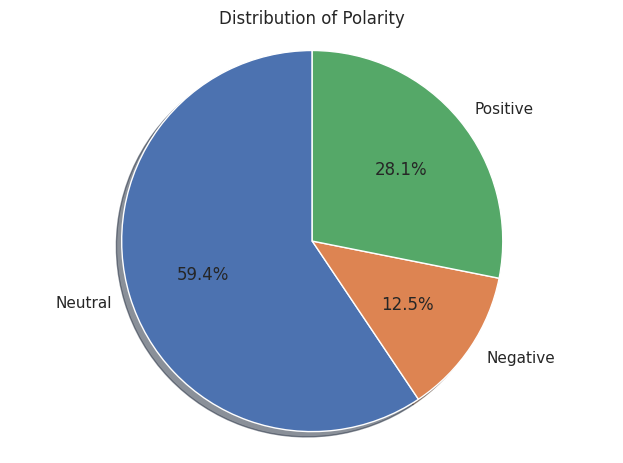

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Neutral', 'Negative', 'Positive'
total = raw['label'].count()
Neutral = raw['label'][raw['label'] == 'Neutral'].count() / total
Negative = raw['label'][raw['label'] == 'Negative'].count() / total
Positive = raw['label'][raw['label'] == 'Positive'].count() / total
sizes = [Neutral, Negative, Positive]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Polarity', fontsize=12)
plt.set_cmap("gist_rainbow")
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Number of News')

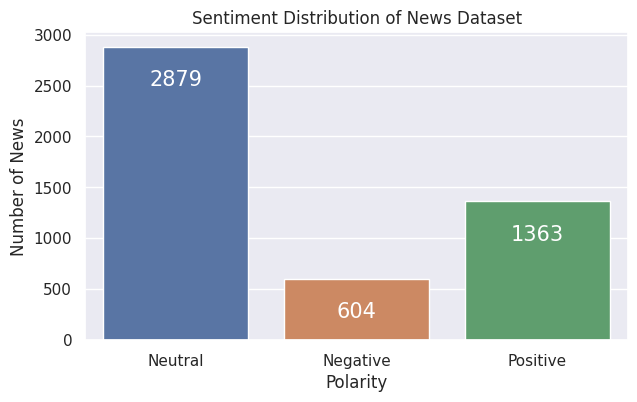

In [ ]:
# Configure the plot size
plt.figure(figsize = (7, 4))
sns.set(style='darkgrid')

ax = sns.countplot(x='label', data = raw)
# Increase information on the figure
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=15)
plt.title('Sentiment Distribution of News Dataset')
plt.xlabel('Polarity')
plt.ylabel('Number of News')